<img src='https://raw.githubusercontent.com/MRippe7/images/master/FEDE1.png' width=1100>


# Un pequeño modelo
Hemos visto algunas de las tareas que deben realizarse sobre la base de datos para tener un modelo que funcione un poco mejor, ahora estudiaremos un poco más la base de datos, para darnos una idea de lo que sucede con los datos allí consignados, esto es fundamental antes de realizar cualquier modelo, ya que nos da un entendimiento de los hechos partiendo de los datos.


In [ ]:
from sklearn.preprocessing import StandardScaler
variables = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Tomamos las variables
x = iris.loc[:, variables].values
# Separamos la variable objetivo
y = iris.loc[:,['target']].values
# Estandarizamos las variables
x = StandardScaler().fit_transform(x)

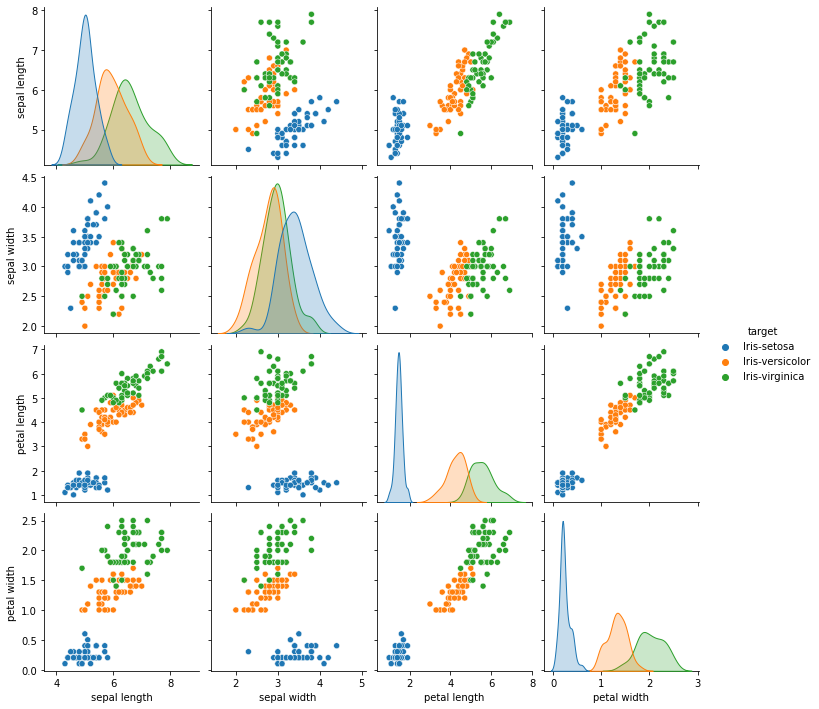

In [ ]:
sns.pairplot(iris, hue='target')

In [ ]:
data = iris.values
#data

In [ ]:
X = data[:,0:4]
Y = data[:,4]

In [ ]:
ig = iris.groupby(['target']).mean().reset_index()
ig

,target,sepal length,sepal width,petal length,petal width
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


In [ ]:
import plotly.graph_objects as go

x=ig.columns[1:]
fig = go.Figure(go.Bar(x=x, y=[5.006,	3.418,	1.464,	0.244], name='Setosa'))
fig.add_trace(go.Bar(x=x, y=[5.936,	2.770,	4.260,	1.326], name='Versicolor'))
fig.add_trace(go.Bar(x=x, y=[6.588,	2.974,	5.552,	2.026], name='Virginica'))

fig.update_layout(barmode='group', xaxis={'categoryorder':'total descending'})
fig.show()

## Entrenamiento del modelo

Para este ejemplo utilizaremos una **Máquina de Soporte Vectorial** (VSM por sus siglas en inglés), para ello hablaremos un poco sobre la idea general detrás del método y luego aprenderemos a utilizarlo:

El objetivo de éste modelo es, construir un hiperplano (o varios) que separe(n) las distintas clases, teniendo en mente que, el plano debe tener la mayor distancia posible a los puntos más cercanos a él, a esos puntos (los más cercanos al plano) se les conoce como los vectores de soporte

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_001.png'>

*Imagen tomada de [Scikit-learn](https://scikit-learn.org/stable/modules/svm.html#svm)* 



In [ ]:
# Estandarizamos las variables
X1 = StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
# Traemos las funciones que permiten dividir el conjunto de datos en entrenamiento y prueba, para hacerlo sobre nuestros datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=2024)
X1_train, X1_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=2024)


In [ ]:
from sklearn.svm import SVC
# Inicializamos dos modelos y los entrenamos con los datos no estandarizados y estandarizados, respectivamente
svn = SVC()
svn1 = SVC()
svn.fit(X_train, y_train)
svn1.fit(X1_train, y_train)

SVC()

## Evaluación del modelo

In [ ]:
## PRIMER MODELO

# Predecir en el conjunto de prueba
predictions = svn.predict(X_test)
# Calcular 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8666666666666667

In [ ]:
## SEGUNDO MODELO

# Predecir en el conjunto de prueba
predictions1 = svn1.predict(X1_test)
# Calcular 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions1)

0.9333333333333333

In [ ]:
# Reporte detallado de la clasificación primer modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.70      0.88      0.78         8
 Iris-virginica       0.88      0.70      0.78        10

       accuracy                           0.87        30
      macro avg       0.86      0.86      0.85        30
   weighted avg       0.88      0.87      0.87        30



In [ ]:
# Reporte detallado de la clasificación segundo modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Importamos las funciones necesarias para calcular la matriz de confusión 

In [ ]:
# Calculamos la matriz de confusión para el primer modelo
confusion_matrix(y_test,predictions)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  3,  7]])

In [ ]:
# Agregamos las etiquetas de los datos, para una mejor lectura de los resultados
cm = confusion_matrix(y_test, predictions, labels=svn.classes_)

In [ ]:
# Generamos un gráfico partiendo de la información anterior
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svn.classes_)

NameError: ignored

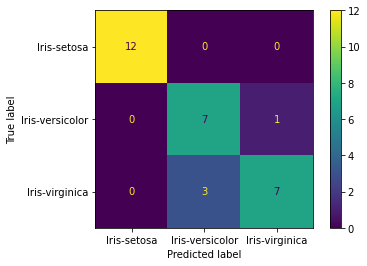

In [ ]:
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
# Podremos conocer el desempeño del modelo en cada una de las clases
multilabel_confusion_matrix(y_test, predictions,labels=svn.classes_)

array([[[18,  0],
        [ 0, 12]],

       [[19,  3],
        [ 1,  7]],

       [[19,  1],
        [ 3,  7]]])

In [ ]:
# Agregamos la información a la variable mcm para que pueda ser graficada más adelante
mcm = multilabel_confusion_matrix(y_test, predictions,labels=svn.classes_)

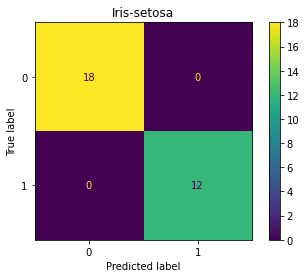

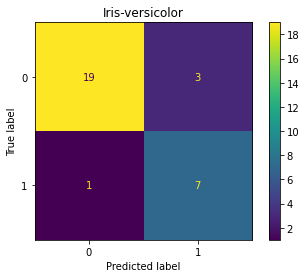

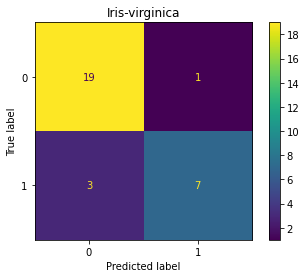

In [ ]:
# Generamos los gráficos por cada clase
k=0
for i in mcm:
  disp = ConfusionMatrixDisplay(confusion_matrix=i)
  disp.plot()
  plt.title(svn.classes_[k])
  plt.show()
  k=k+1

**Verdadero positivo (tp):** número de registros positivos que el modelo predice como positivos. 

**Falso positivo (fp):** número de registros negativos que el modelo predice como positivos. 

**Falso negativo (fn):** número de registros positivos que el modelo predice como negativos. 

**Verdadero negativo (tn):** número de registros negativos que el modelo predice como negativos. 

**Exactitud (accuracy):** la fracción de predicciones que el modelo realizó correctamente.  Se representa como un porcentaje o un valor entre 0 y 1. Es una buena métrica cuando tenemos un conjunto de datos balanceado, esto es, cuando el número de etiquetas de cada clase es similar. $$accuracy = \frac{tp+tn}{tp+tn+fp+fn}$$


La **precisión (precision)** es la relación $$\displaystyle{precision = \frac{tp}{tp + fp},}$$ donde $tp$ es el número de verdaderos positivos y $fp$ el número de falsos positivos. Básicamente, la precisión es la capacidad del clasificador de no etiquetar como positiva una muestra que es negativa.

El **sensibilidad (recall)** se define como el número de verdaderos positivos ($tp$) sobre el número de verdaderos positivos más el número de falsos negativos ($fn$).
$$recall = \frac{tp}{tp+fn}.$$

La **medida F1** se puede interpretar como la media armónica de  **precision** y **recall**, su mejor valor es 1 y el peor es 0. La contribución relativa de **precision** y **recall**, a la medida F1 es igual y su fórmula es la siguiente:

$$F1 = 2 \frac{precision * recall}{precision + recall}$$

Cuando $tp+fp = 0$, la precisión no está definida. Cuando $tp+fn= 0$, el recall no está definido. En tales casos, de forma predeterminada, la métrica se establecerá en 0, al igual que el puntaje f1.


## ¿Cómo predecir datos que no hacen parte de la base original?

Esta tarea es primordial ya que, la idea es utilizar el modelo sobre datos que no han pasado por él, y esto lo veremos en las siguientes líneas de código:

In [ ]:
# Valores nuevos de las características de las flores
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Predicción de la clase 
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


## ¿Cómo podemos usar este modelo de nuevo?
No siempre que se quiera usar un modelo se debe entrenar, ya que hay modelos que tardan horas o incluso días en dicho proceso. Para evitar este paso repetitivo, se puede almacenar el modelo obtenido en un tipo de archivo especial (`pickle`) y así usar el modelo que ha sido previamente entrenado:

In [ ]:
# Almacenar el modelo
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)
# Cargar el modelo almacenado
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)

## Validación cruzada (Cross Validation - CV)
En el enfoque básico, llamado k-fold CV, el conjunto de entrenamiento se divide en k conjuntos más pequeños. Para cada uno de los k "pliegues" se sigue el siguiente procedimiento:

- Se entrena un modelo utilizando los pliegues como datos de entrenamiento;
el modelo resultante se valida con la parte restante de los datos (es decir, se utiliza como conjunto de prueba para calcular una medida de rendimiento como la precisión).

- La medida de rendimiento informada por la validación cruzada de k veces es entonces el promedio de los valores calculados en el ciclo. Este enfoque puede ser computacionalmente costoso, pero no desperdicia demasiados datos (como es el caso cuando se arregla un conjunto de validación arbitrario), lo cual es una gran ventaja en problemas donde el número de muestras es muy pequeño.

<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png'>

Una estrategia basada en los k-fold cv, es la conocida como `StratifiedKFold`, la cual es una variación de k-fold que devuelve pliegues estratificados: cada conjunto contiene aproximadamente el mismo porcentaje de muestras de cada clase objetivo que el conjunto completo. Esta estrategia es útil cuando se quiere preservar el balance o desbalance de los datos originales.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Se instancia el Kfold con 5 lotes
k_folds = KFold(n_splits = 5, shuffle = True, random_state = 2022)
# Iteración sobre cada "pliegue" o "lote"
for train_index, val_index in k_folds.split(X):
    # Separación en datos de entrenamiento y validación para el lote correspondiente
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index] 
    # Se instancia el modelo
    svm_model = svm.SVC()
    # Entrenamiento
    svm_model.fit(X_train, y_train)
    # Predicciones sobre el conjunto de validación
    val_preds = svm_model.predict(X_val)
    # Generación de métricas
    val_accuracy = accuracy_score(y_val, val_preds)
    val_confusion_matrix = confusion_matrix(y_val, val_preds)
    # Se muestran los resultados obtenidos en el lote
    print(f'Accuracy Score: {val_accuracy}')
    print(f'Confusion Matrix: \n{val_confusion_matrix}')

Accuracy Score: 0.9666666666666667
Confusion Matrix: 
[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
Accuracy Score: 1.0
Confusion Matrix: 
[[ 9  0  0]
 [ 0 11  0]
 [ 0  0 10]]
Accuracy Score: 0.9666666666666667
Confusion Matrix: 
[[13  0  0]
 [ 0  9  1]
 [ 0  0  7]]
Accuracy Score: 0.8666666666666667
Confusion Matrix: 
[[8 0 0]
 [0 9 1]
 [0 3 9]]
Accuracy Score: 0.9666666666666667
Confusion Matrix: 
[[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]


## Hiperparámetros:
Son los valores, que por lo general, no se obtienen de los datos, por lo que deben ser ingresados manualmente al modelo. El valor óptimo de un hiperparámetro no se puede conocer a priori para un problema dado, por lo que suelen usarse los valores genéricos o valores que han mostrado un buen rendimiento anteriormente, por ejemplo:

- El parámetro de regularización de una SVM.
- La razón de aprendizaje en el algoritmo del descenso del gradiente.
- El número de vecinos en k-vecinos más cercanos.
- La profundidad máxima en un árbol de decisión.

In [ ]:
# Se divide el conjunto de datos y se crea una lista vacía, en ella se almacenarán los resultados de cada modelo
X_train, X_val = X[train_index], X[val_index]
y_train, y_val = Y[train_index], Y[val_index]
acc = []
# Se generan modelos modificando el hiperparámetro C de las SVM
for i in range(1,101):
  svm_model = svm.SVC(C=i/100)
  svm_model.fit(X_train, y_train)
  val_preds = svm_model.predict(X_val)
  val_accuracy = accuracy_score(y_val, val_preds)
  acc.append(val_accuracy)

In [ ]:
# Buscamos la mínima y la máxima precisión de todos los modelos que se generaron
min(acc)

0.26666666666666666

In [ ]:
max(acc)

0.9666666666666667

<img src='https://raw.githubusercontent.com/MRippe7/images/master/FEDE2.png' width=1100>